In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [4]:
df = pd.read_csv(r'C:\Users\ssp1_\OneDrive\Desktop\majorprojects\Graduate-Admission-Prediction-using-ANN-main\Admission_Predict.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(400, 9)

# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
df.duplicated().sum()

0

# Data Handling

In [9]:
df.drop(columns=['Serial No.'],inplace=True)

# Split Data

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Scaling data

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# modelling

In [14]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
def r2_score(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - (ss_res / ss_tot)

In [17]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=[r2_score])

In [18]:
history = model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10


8/8 [==============================] - 2s 63ms/step - loss: 0.8504 - r2_score: -41.8344 - val_loss: 0.8281 - val_r2_score: -63.6474
Epoch 2/10
8/8 [==============================] - 0s 14ms/step - loss: 0.7533 - r2_score: -36.8037 - val_loss: 0.7356 - val_r2_score: -56.4343
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 0.6678 - r2_score: -32.0800 - val_loss: 0.6500 - val_r2_score: -49.7611
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 0.5864 - r2_score: -29.1921 - val_loss: 0.5684 - val_r2_score: -43.3752
Epoch 5/10
8/8 [==============================] - 0s 11ms/step - loss: 0.5096 - r2_score: -24.4385 - val_loss: 0.4894 - val_r2_score: -37.1884
Epoch 6/10
8/8 [==============================] - 0s 12ms/step - loss: 0.4378 - r2_score: -20.8402 - val_loss: 0.4184 - val_r2_score: -31.6595
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 0.3733 - r2_score: -17.8476 - val_loss: 0.3586 - val_r2_score: -26.998

In [19]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 4ms/step


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-7.266738123595314

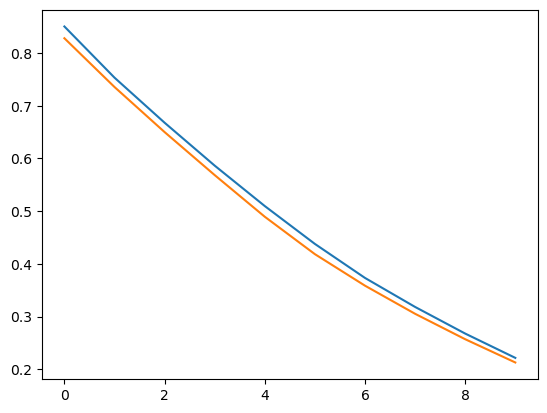

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

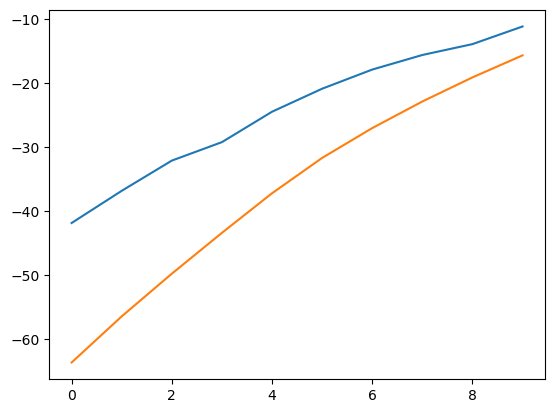

In [22]:
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])